In [2]:
import cv2
import os

In [39]:
def get_v_data(v: cv2.VideoCapture):
    return {
        "fps": round(v.get(cv2.CAP_PROP_FPS)),
        "total_f": v.get(cv2.CAP_PROP_FRAME_COUNT)
	}

In [40]:
def f2s(f, fps):
    return f / fps

def s2f(s, fps):
    return s * fps

In [3]:
video_root = './v'
data_root = './data'

if not os.path.exists(data_root):
    os.makedirs(data_root)

In [50]:
def extract_data(ep, v: cv2.VideoCapture, start, end, freq):
	cur_f = start
	serial = 0
	while (True):
		v.set(cv2.CAP_PROP_POS_FRAMES, cur_f - 1) # set as f - 1 to read f
		ret, frame = v.read()
		if not ret:
			break

		if cur_f > end:
			break
		
		cur_f += freq

		file_name = f'{data_root}/{ep}_{serial}.jpg'
		cv2.imwrite(file_name, frame)
		serial += 1

In [51]:
def extract_video(ep: int):
	v = cv2.VideoCapture(f"{video_root}/{ep}.mp4")
	
	config = get_v_data(v)

	start_f = s2f(2 * 60, config['fps'])
	end_f = config['total_f'] - s2f(3 * 60, config['fps'])
	freq = s2f(5, config['fps'])

	print(f'ep {ep}: {config}')
	extract_data(ep, v, start_f, end_f, freq)

	v.release()
	cv2.destroyAllWindows()


In [52]:
for file in os.listdir(video_root):
    extract_video(file.split('.')[0])
    print(file)

ep 1: {'fps': 24, 'total_f': 68573.0}
1.mp4
ep 2: {'fps': 24, 'total_f': 34044.0}
2.mp4
ep 3: {'fps': 24, 'total_f': 34046.0}
3.mp4
ep 4: {'fps': 24, 'total_f': 34045.0}
4.mp4
ep 5: {'fps': 24, 'total_f': 34046.0}
5.mp4


In [ ]:
for i in range(6, 25):
    extract_video(i)

ep 6: {'fps': 24, 'total_f': 34045.0}
ep 7: {'fps': 24, 'total_f': 34045.0}
ep 8: {'fps': 24, 'total_f': 34045.0}
ep 9: {'fps': 24, 'total_f': 34047.0}
ep 10: {'fps': 24, 'total_f': 34526.0}
ep 11: {'fps': 24, 'total_f': 34047.0}
ep 12: {'fps': 24, 'total_f': 34046.0}
ep 13: {'fps': 24, 'total_f': 34044.0}
ep 14: {'fps': 24, 'total_f': 34046.0}
ep 15: {'fps': 24, 'total_f': 34047.0}
ep 16: {'fps': 24, 'total_f': 34046.0}
ep 17: {'fps': 24, 'total_f': 34095.0}
ep 18: {'fps': 24, 'total_f': 34046.0}
ep 19: {'fps': 24, 'total_f': 34046.0}
ep 20: {'fps': 24, 'total_f': 34046.0}
ep 21: {'fps': 24, 'total_f': 34045.0}
ep 22: {'fps': 24, 'total_f': 34046.0}
ep 23: {'fps': 24, 'total_f': 34046.0}
ep 24: {'fps': 24, 'total_f': 34045.0}


In [55]:
extract_video(18.5)

ep 18.5: {'fps': 24, 'total_f': 34095.0}


img size: 1280 * 720

In [51]:
W = 1280
H = 720

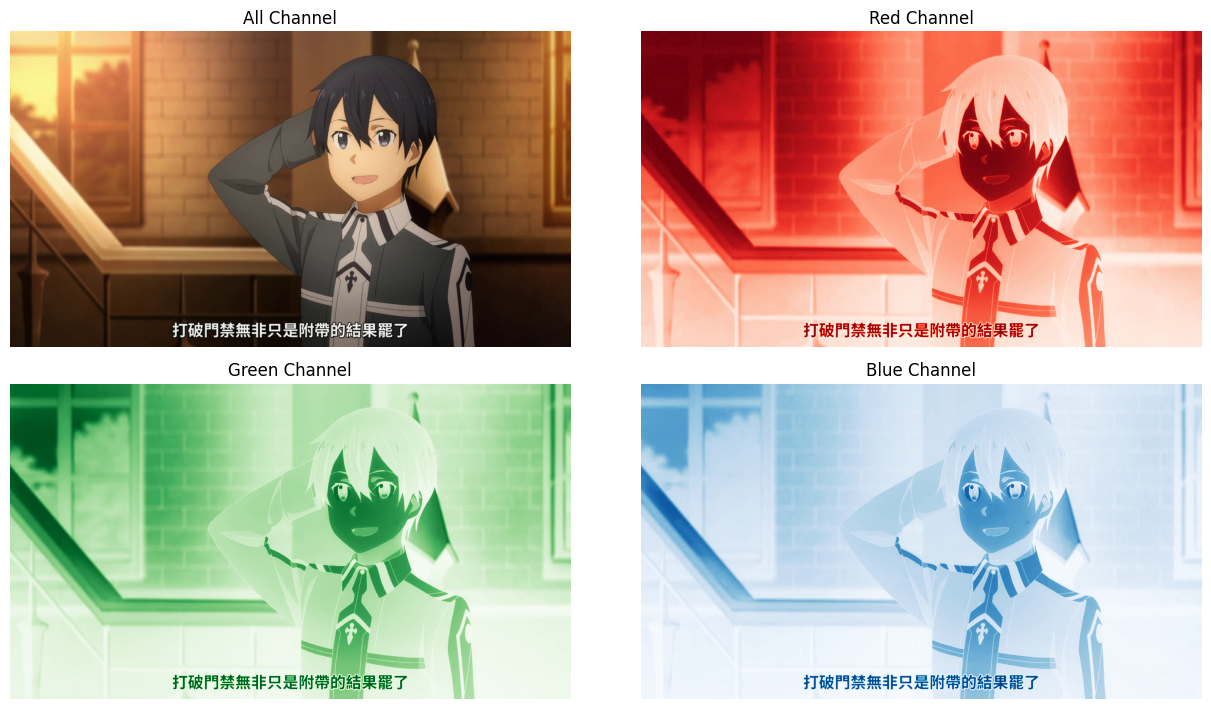

In [30]:
import cv2
import matplotlib.pyplot as plt

# Load an image using OpenCV
image = cv2.imread("./data/7_109.jpg")  # Replace with the path to your image

# Convert the image from BGR (OpenCV format) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into R, G, B channels
R, G, B = cv2.split(image_rgb)

# Set up the subplots for each channel
fig, axes = plt.subplots(2, 2, figsize=(12.8, 7.2))

axes[0, 0].imshow(image_rgb)
axes[0, 0].set_title("All Channel")
axes[0, 0].axis("off")

# Plot each channel separately
axes[0, 1].imshow(R, cmap="Reds")
axes[0, 1].set_title("Red Channel")
axes[0, 1].axis("off")

axes[1, 0].imshow(G, cmap="Greens")
axes[1, 0].set_title("Green Channel")
axes[1, 0].axis("off")

axes[1, 1].imshow(B, cmap="Blues")
axes[1, 1].set_title("Blue Channel")
axes[1, 1].axis("off")

# Display the plots
plt.tight_layout()
plt.show()


In [27]:
import numpy as np

print(R)
print(np.mean(R))
print(np.mean(G))
print(np.mean(B))

[[29 29 29 ... 14 14 14]
 [29 30 30 ... 14 14 14]
 [29 29 29 ... 16 16 16]
 ...
 [65 65 65 ... 90 90 90]
 [65 65 65 ... 90 90 90]
 [65 65 65 ... 92 92 92]]
106.52555447048611
84.39699544270833
59.46539930555556


In [118]:
avr_RGB_data = {}
for filename in os.listdir(data_root):
	serial = filename.split('.')[0]
	image = cv2.imread(f"{data_root}/{filename}")
	image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

	avr_RGB_data[serial] = [round(np.mean(c)) for c in cv2.split(image_rgb)]

In [119]:
import json

obj = json.dumps(avr_RGB_data, indent=2)
with open("./avr_rgb.json", 'w+', encoding='utf-8') as f:
	f.write(obj)

In [120]:
import json

with open('./avr_rgb.json', encoding='utf-8') as f:
    json.dump(avr_RGB_data, f)

UnsupportedOperation: not writable

1920 1232
1920 1080


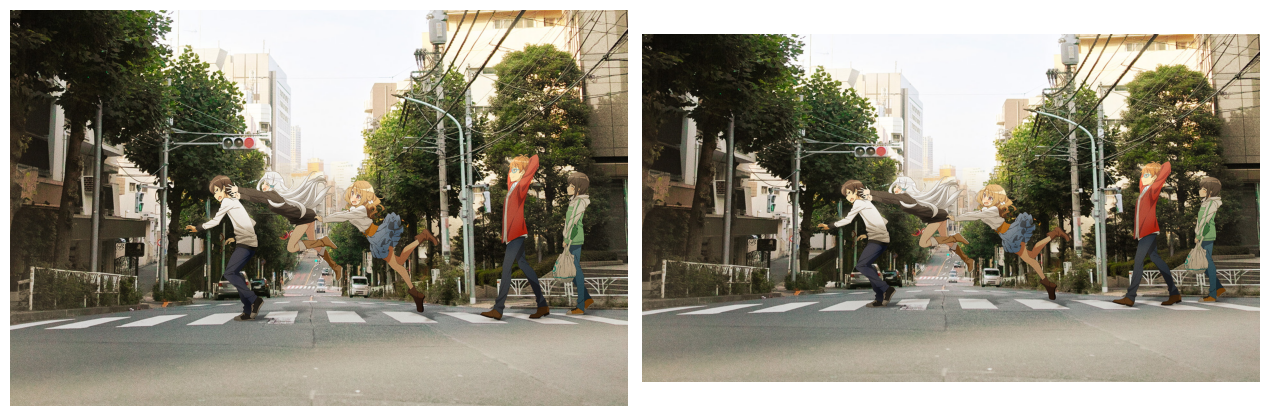

In [ ]:
target = cv2.imread('./target.jpg')

target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)

h, w, _ = target.shape
print(w, h)

# W:H = w:h'
# => h' = H/W * w

h_prime = round(H / W * w)
print(w, h_prime)

t = cv2.resize(target, (w, h_prime))

fig, axes = plt.subplots(1, 2, figsize=(12.8, 7.2))
axes[0].imshow(target)
axes[0].axis("off")

axes[1].imshow(t)
axes[1].axis("off")

plt.tight_layout()
plt.show()

t = cv2.cvtColor(t, cv2.COLOR_BGR2RGB)
cv2.imwrite('./target_T.jpg', t)

In [163]:
height, width, channels = t.shape

W_SIZE = 100
H_SIZE = 100

# Set `w` and `h_prime` to image width and height
w = width
h_prime = height

# fig, axes = plt.subplots(W_SIZE, H_SIZE, figsize=(12.8, 7.2))

subs = []

for ih in range(H_SIZE):
    for iw in range(W_SIZE):
        x = w / W_SIZE * iw 
        y = h_prime / H_SIZE * ih

        w_sub = w / W_SIZE
        h_sub = h_prime / H_SIZE
        # print(x, y, h_sub, w_sub)
        sub = t[int(y):int(y+h_sub), int(x):int(x+w_sub)]
        subs.append(sub)

#         axes[ih][iw].imshow(sub)
#         axes[ih][iw].axis("off")

# plt.subplots_adjust(wspace=0.02, hspace=0.02)
# plt.show()


In [164]:
target_avr_RGB_data = {}
for i, img in enumerate(subs):
	
	target_avr_RGB_data[i] = [round(np.mean(c)) for c in cv2.split(img)]

t_RGB = list(target_avr_RGB_data.values())
t_serials = list(target_avr_RGB_data.keys())

In [165]:
from sklearn.neighbors import NearestNeighbors

In [166]:
RGB = list(avr_RGB_data.values())
serials = list(avr_RGB_data.keys())

print(RGB[:10])

[[193, 169, 126], [119, 102, 79], [244, 246, 246], [88, 51, 71], [143, 42, 52], [173, 53, 62], [111, 55, 61], [113, 69, 86], [108, 48, 52], [108, 66, 82]]


In [167]:
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(RGB)

In [168]:
import random

In [169]:

_, indices = nbrs.kneighbors(t_RGB)

selected_serial = []

for i, ind in enumerate(indices):
	ind = ind.tolist()
	fit_num = random.sample(ind, 1)[0]
	fit_serial = serials[fit_num]
	selected_serial.append(fit_serial)

# 	fit_img = cv2.imread(f"{data_root}/{fit_serial}.jpg")

# 	x = i // H_SIZE
# 	y = i % H_SIZE

# 	axes[x][y].imshow(fit_img)
# 	axes[x][y].axis("off")

# plt.subplots_adjust(wspace=0.02, hspace=0.02)
# plt.show()

In [170]:
print(selected_serial)

['12_77', '3_200', '15_50', '10_164', '10_164', '3_222', '1_95', '1_95', '10_160', '19_149', '10_174', '10_174', '5_96', '10_169', '5_96', '5_220', '10_146', '2_169', '1_354', '1_302', '10_158', '1_296', '8_6', '10_12', '16_142', '5_168', '10_10', '16_27', '24_189', '24_113', '10_58', '21_105', '24_189', '24_189', '21_105', '24_189', '21_105', '24_189', '24_189', '21_105', '16_27', '24_189', '24_189', '16_27', '21_105', '16_27', '21_105', '24_189', '24_189', '6_17', '6_17', '24_189', '24_189', '21_105', '16_27', '16_27', '16_27', '6_17', '6_17', '16_27', '6_17', '24_189', '16_27', '21_105', '21_105', '10_58', '24_113', '24_189', '5_13', '23_222', '20_160', '13_69', '5_166', '23_124', '17_29', '6_223', '13_69', '5_166', '13_183', '17_158', '11_26', '14_70', '6_213', '2_183', '1_199', '17_207', '17_181', '17_181', '17_181', '17_213', '15_14', '9_76', '20_155', '20_160', '20_154', '23_120', '20_154', '20_171', '8_31', '6_192', '5_220', '3_217', '1_95', '3_222', '10_164', '10_164', '10_174

In [171]:
thumb_width, thumb_height = W / W_SIZE * 5, H / H_SIZE * 5
grid_width = round(W_SIZE * thumb_width)
grid_height = round(H_SIZE * thumb_height)

print(thumb_width, thumb_height)
print(grid_width, grid_height)

thumb_width, thumb_height = round(thumb_width), round(thumb_height)

64.0 36.0
6400 3600


In [172]:
from PIL import Image

# Preload images into memory if feasible
def load_image(serial):
    img_path = f"{data_root}/{serial}.jpg"
    img = Image.open(img_path).convert("RGB")
    return img.resize((thumb_width, thumb_height), Image.Resampling.LANCZOS)

preloaded_images = [load_image(serial) for serial in selected_serial]

In [173]:
# Create a blank canvas to paste images onto
composite_image = Image.new("RGB", (grid_width, grid_height))

# Populate the grid with the images
for i, img in enumerate(preloaded_images):
    # Calculate position in the grid
    x = (i % W_SIZE) * thumb_width
    y = (i // W_SIZE) * thumb_height

    composite_image.paste(img, (round(x), round(y)))

# composite_image.show()


In [ ]:
with open('./result1.jpg', 'w+') as f:
    composite_image.save(f, "JPEG")